In [1]:
import pandas as pd


In [3]:
df=pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
#convert it into model
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
# df['Category'] is a column with values like "spam" or "ham".

# The lambda function says:
# 👉 if value is 'spam', return 1; else return 0.

# .apply(...) applies this function to each row in the Category column.

# Then it saves the results into a new column called 'spam'.
df.head()

# In js it's like
# const updatedData = data.map(item => {
#   return {
#     ...item,
#     spam: item.Category === "spam" ? 1 : 0
#   };
# });

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.25)

#now converting Message into numerical using CountVectorizer
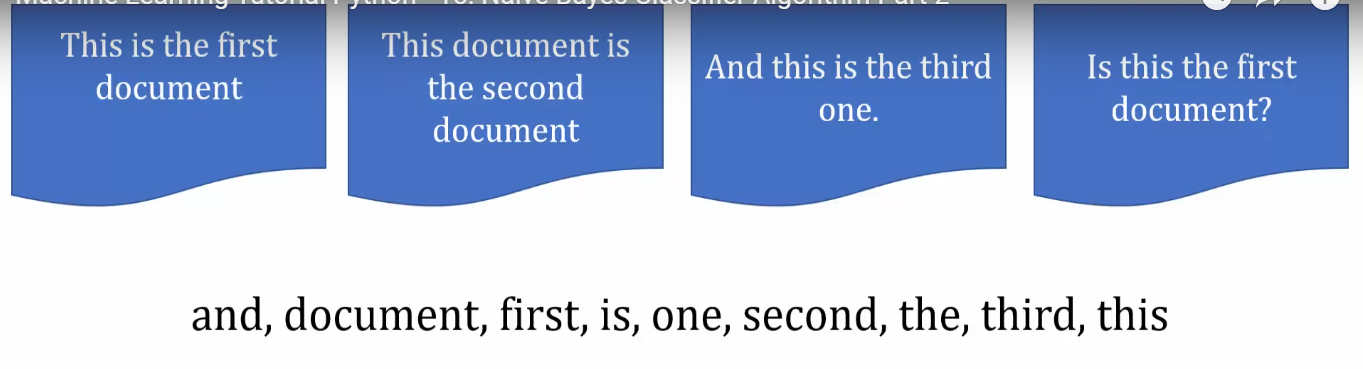
first find the unique word now treat this word as a features then build the matrix as
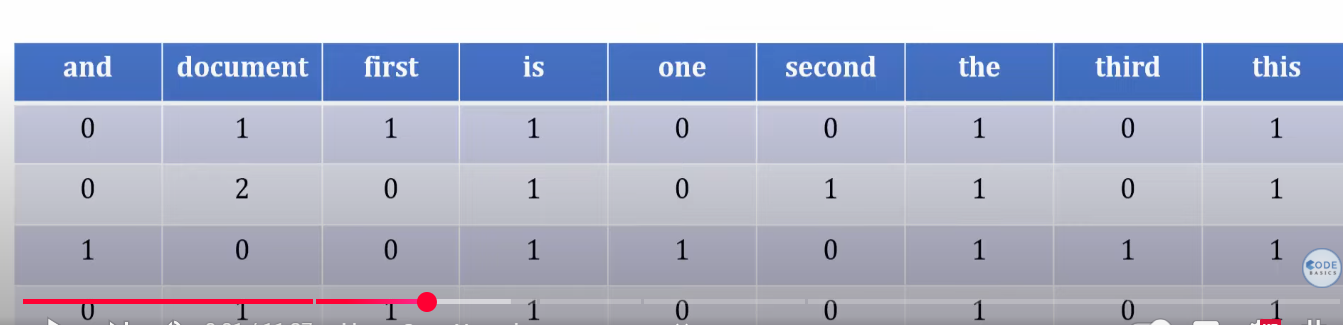

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
from sklearn.naive_bayes import MultinomialNB #it has 3 before we use Gaussian
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

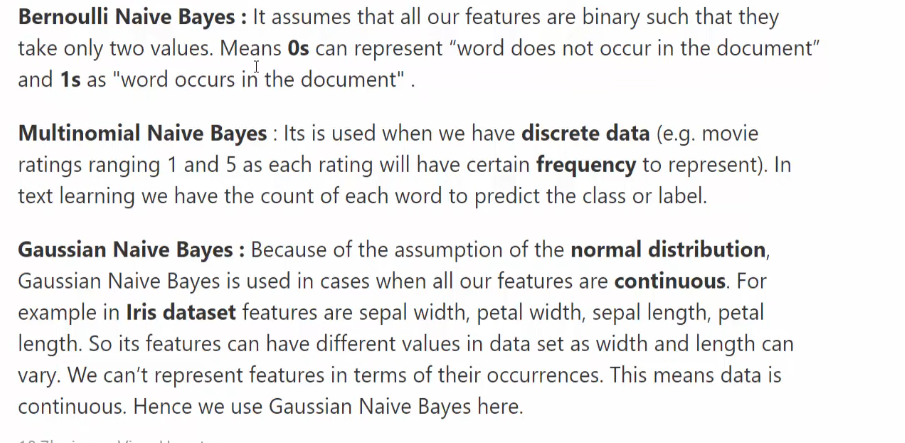

In [13]:
emails = [
    'My name is atullya maharjan',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [15]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9885139985642498

Sklearn Pipeline

In [16]:
#here coverting word into matrix way cause inconvienent i.e need to calle transform() method before training model we have a sklearn pipeline which
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
]) #we try to simpify the above code

In [17]:
clf.fit(X_train, y_train) #feeding text directly than that pipeline internally convert into vector first then apply Naive Bayes

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [18]:
clf.score(X_test,y_test)

0.9885139985642498

In [19]:
clf.predict(emails)

array([0, 1], dtype=int64)